**NEW Figure 4**

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
glob_temp = np.arange(-0.2,6.8,0.1)

add = ''
# add= '_temp_above_0_8'
# this is actually not neces
approach = '_via_5yravg'
DATE = 'Feb12_2024'

no_rel_farinotti = True ### did not do the lowess stuf rel_farinotti!!!

In [119]:
from help_functions import d_reg_num_name

In [9]:
p_shift='_shift_years_rel_2020'

# todo: move that to the lowess fit stuff directly????
avg_over = '101yr'
#add = '_fit_to_median_lowess_added'
add = '_lowess_added_quantiles_added'
rel_add = '_rel_2020'
norm_add = '_clusters_normalised'
k = 3

In [10]:
pd_lowess_ch = pd.read_csv(f'lowess_fit_cluster{k}_{rel_add}_{avg_over}_{add}{norm_add}{DATE}.csv',
                          index_col=[0])
pd_lowess_ch['region'] = pd_lowess_ch.index




# palette_cb = sns.color_palette(['#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF'])
cols = list(sns.color_palette('colorblind'))
palette_cb = sns.color_palette([cols[5],cols[4],cols[2], cols[7]])

num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)',
            5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)',
            10:'(k)', 11:'(l)', 12:'(m)'} # remove global stuff


_pd_lowess_ch = pd_lowess_ch.loc[pd_lowess_ch.index!='Globally']
_pd_lowess_ch['region'] = _pd_lowess_ch.index
plt.rc('font', size=22)  

/tmp/ipykernel_2702002/2362535120.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pd_lowess_ch['region'] = _pd_lowess_ch.index


In [105]:

fs = 25

def plotlabel_0(xvar, yvar, label, ax=None):
    ax.text(xvar-10, yvar+0.8, label, alpha=0.7, fontsize=fs)
    
    
def plotlabel_1(xvar, yvar, label, ax=None):
    ax.text(xvar+0-1, yvar+0.8, label, alpha=0.7, fontsize=fs)    
    

def plotlabel_b0(xvar, yvar, label, ax=None):
    ax.text(xvar+5, yvar-3.1, label, alpha=0.7, fontsize=fs)

def plotlabel_b(xvar, yvar, label, ax=None):
    ax.text(xvar, yvar-3.1, label, alpha=0.7, fontsize=fs)
    
def plotlabel_bbr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar-32, label, alpha=0.7, fontsize=fs)
    
def plotlabelr_l(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar+5, label, alpha=0.7, fontsize=fs)

def plotlabelr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar+2, label, alpha=0.7, fontsize=fs)
    
    
def plotlabel_c(xvar, yvar, label, ax=None):
    ax.text(xvar-0.08, yvar+0.02, label, alpha=0.7, fontsize=fs)

def plotlabel_cc(xvar, yvar, label, ax=None):
    ax.text(xvar-0.03, yvar-0.06, label, alpha=0.7, fontsize=fs)


In [106]:
pd_lowess_ch['gt_2020_via_5yravg'] = pd_lowess_ch['regional_volume_m3_2020_via_5yravg']*10e-12
df = pd.read_csv(f'3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])

df['gt_2020_via_5yravg'] = df['regional_volume_m3_2020_via_5yravg']*10e-9 /900
_pd_lowess_ch = pd_lowess_ch.loc[pd_lowess_ch.region != 'Globally']
_df = df.loc[df.region!='Globally']

In [149]:
pd_hugo_far_reg.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

/tmp/ipykernel_2702002/3759146147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values


'01: Alaska\n02: W Canada & US\n03: Arctic Canada N\n04: Arctic Canada S\n05: Greenland Periphery\n06: Iceland\n07: Svalbard & Jan Mayen\n08: Scandinavia\n09: Russian Arctic\n10: North Asia\n11: Central Europe\n12: Caucasus & Middle East\n13: Central Asia\n14: South Asia W\n15: South Asia E\n16: Low Latitudes\n17: Southern Andes\n18: New Zealand\n19: Subantarctic & Antarctic Islands\n'

In [180]:
d_reg_num_name['19'] = 'Subantarctic &\n      Antarctic Islands'
d_reg_num_name['12'] =  'Caucasus &\n      Middle East'
d_reg_num_name['05'] =  'Greenland\n      periphery'
d_reg_num_name['07'] = 'Svalbard &\n      Jan Mayen'

SyntaxError: unmatched ')' (2243684936.py, line 4)

In [181]:
pd_hugo_far = pd.read_csv('rgi_vs_2020_volume_hugonnet_estimatesFeb12_2024.csv',index_col=0)
pd_hugo_far_reg = pd_hugo_far.iloc[:-1]
pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values
rgi_regs_sel_sorted_vol = pd_hugo_far_reg.sort_values(by='%_2020_rel_global', ascending=False).index.values

legend_text = ''
for r in pd_hugo_far_reg.index: #rgi_regs_sel_sorted_vol:
    legend_text = legend_text + f'{r}: {d_reg_num_name[r]}\n'
legend_text

/tmp/ipykernel_2702002/3759146147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values


'01: Alaska\n02: W Canada & US\n03: Arctic Canada N\n04: Arctic Canada S\n05: Greenland\n      periphery\n06: Iceland\n07: Svalbard &\n      Jan Mayen\n08: Scandinavia\n09: Russian Arctic\n10: North Asia\n11: Central Europe\n12: Caucasus &\n      Middle East\n13: Central Asia\n14: South Asia W\n15: South Asia E\n16: Low Latitudes\n17: Southern Andes\n18: New Zealand\n19: Subantarctic &\n      Antarctic Islands\n'

-0.8298245614035088
ratio: 2.3548387096774195 slope: 2.7052343696186014
ratio: 1.7452054794520548 slope: 1.5546863180361026


/tmp/ipykernel_2702002/353818227.py:300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0,0,0.86,1))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


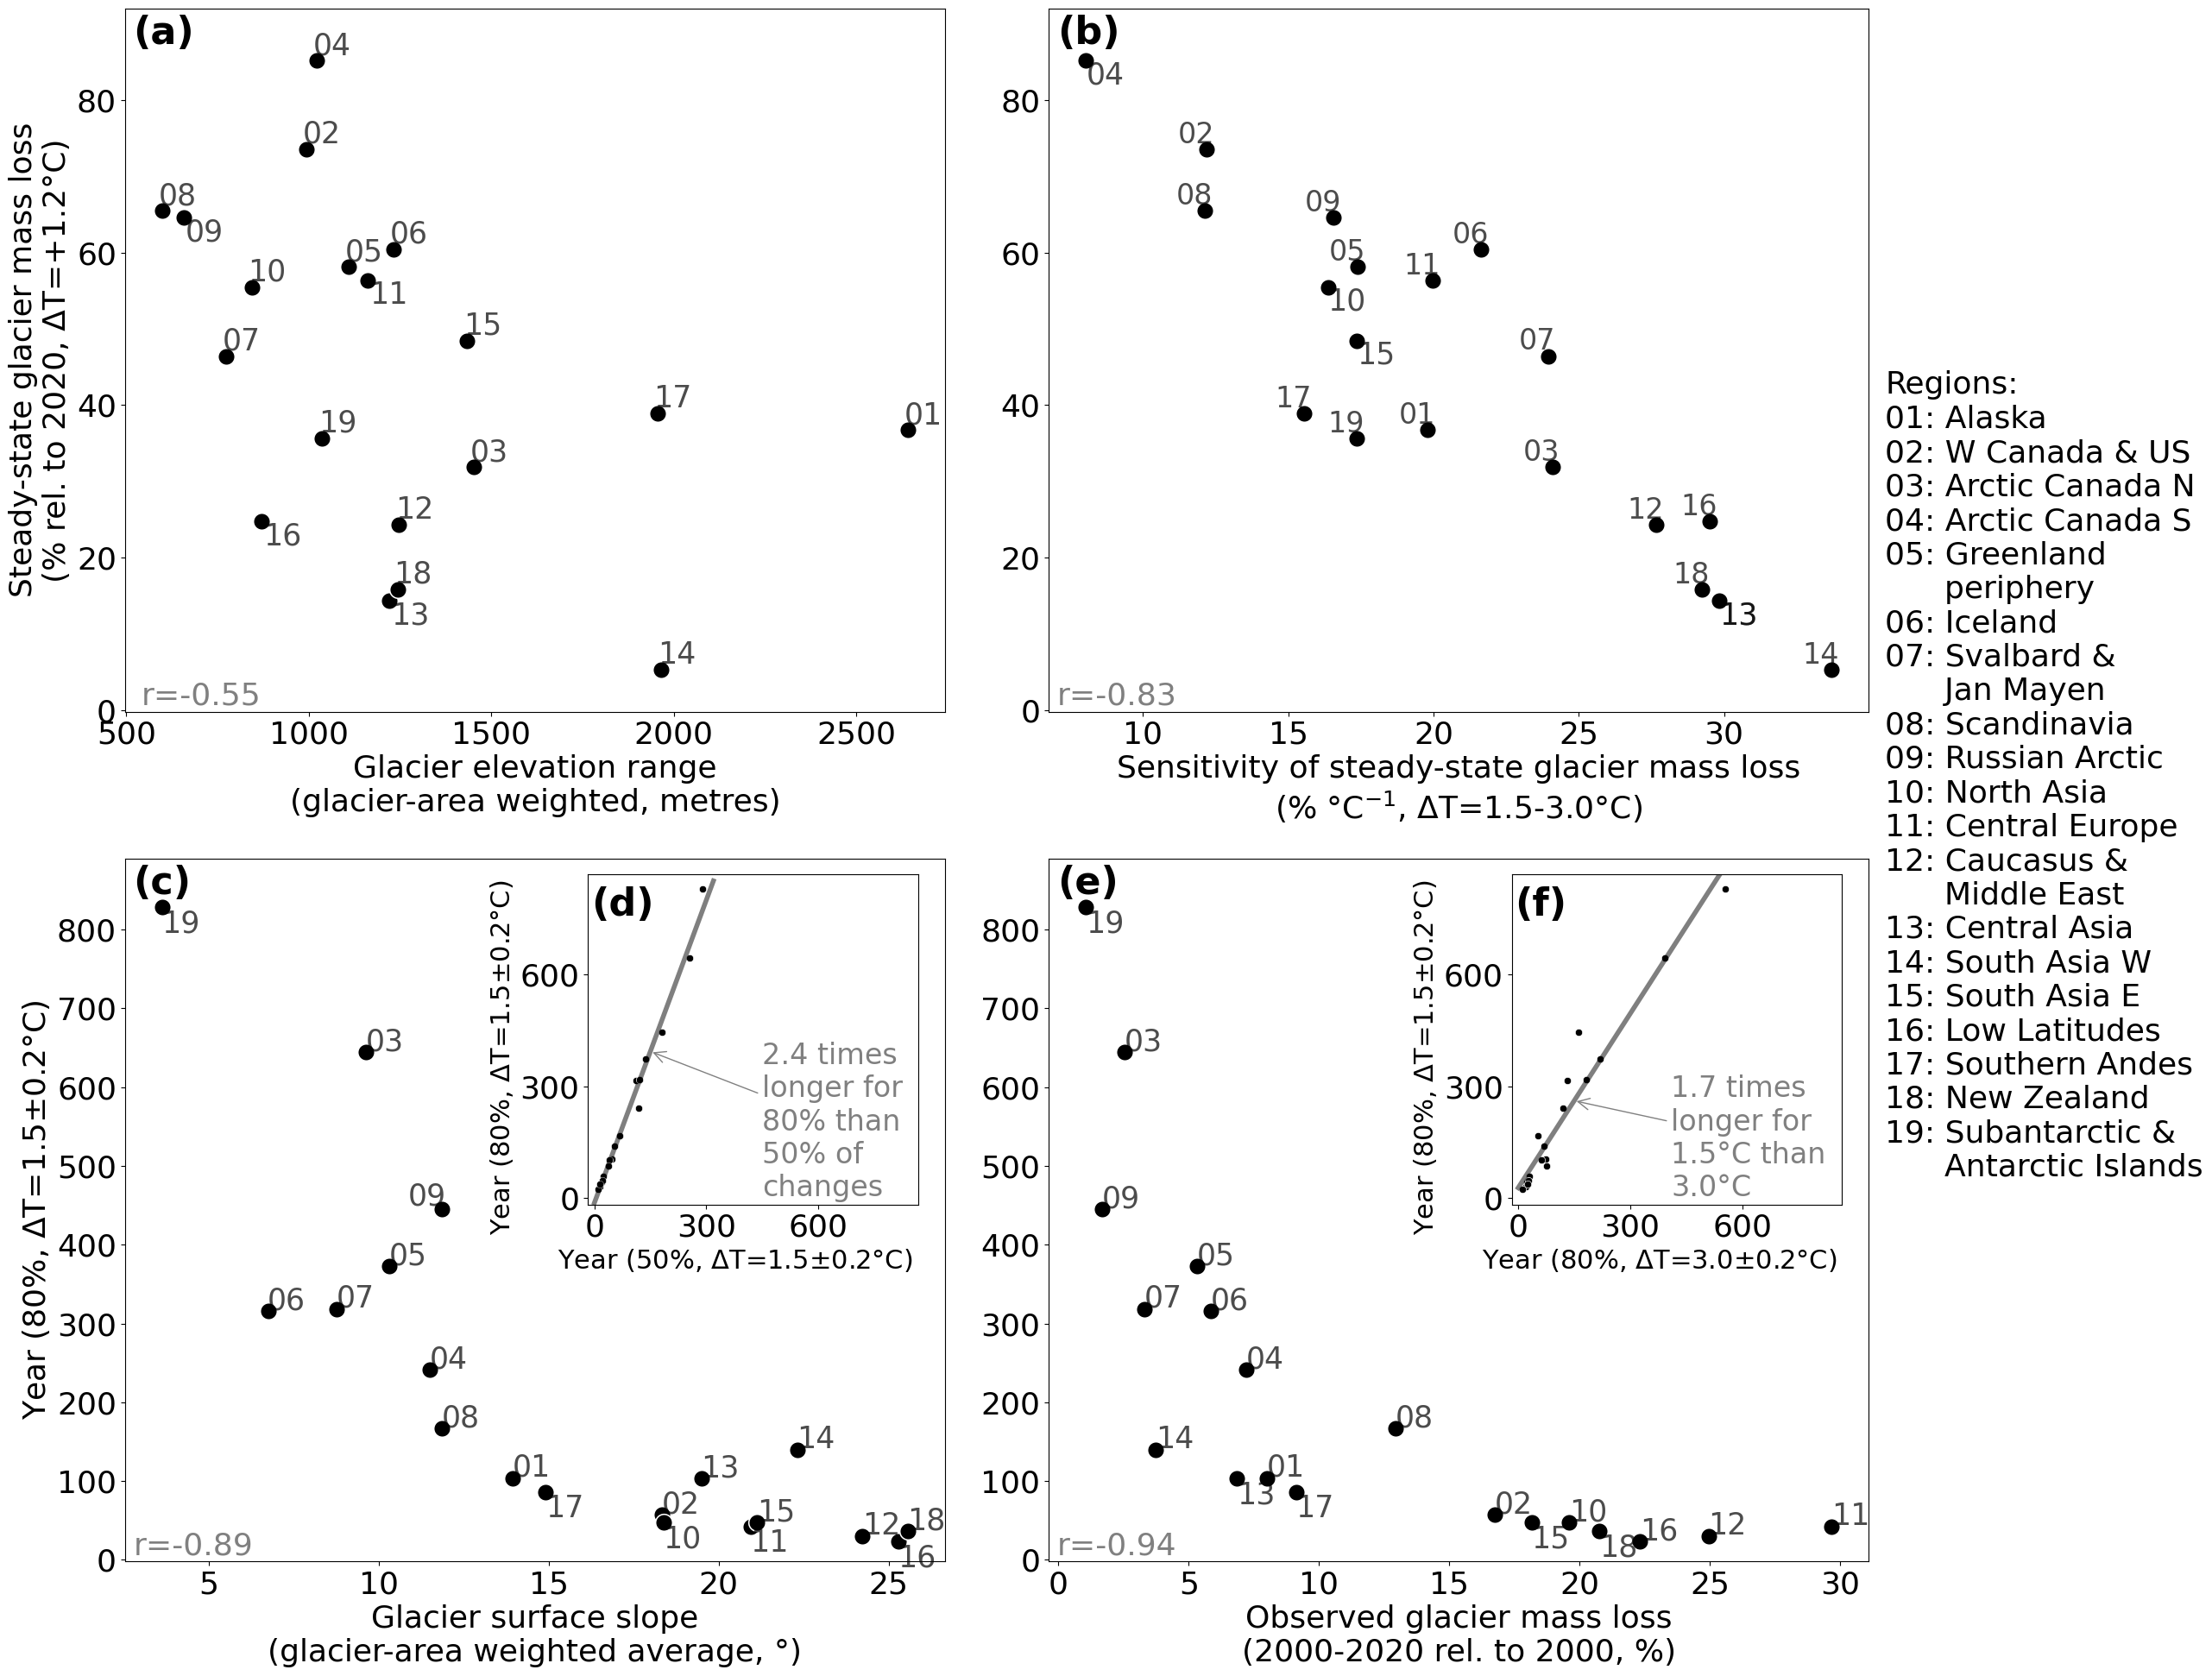

In [183]:
assert (rel_add == '_rel_2020') & (k==3)

plt.rc('font', size=26)  

fig,axs = plt.subplots(2,2,figsize=(26,20))
num_text_x = 0.01
num_text_y = 0.95
axs = axs.flatten()
###

ax=axs[0]

if top_to_median:
    drop_l = ['04','11','07','16','12','13','05']
    ax.set_xlabel(f'Glacier elevation range (top-median)\n(in metres, glacier-area weighted)')
    xx = 'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #

else:
    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    # \n(in metres, glacier-area weighted)

yy = f'ice_loss_1.2°C_%{rel_add}'
sns.scatterplot(data=_pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                #hue=f'kmeans_cluster_{k}{rel_add}',
                #palette=palette_cb[:k],
                color='black',
                s=200, legend = False, ax = ax)
print_spearman = True
corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.02,0.01, f'r={corrcoef}', ha='left', # spearman
            transform=ax.transAxes, color='grey', fontsize=26)
    

#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
_pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
_pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
if rel_add == '_rel_farinotti':
    ax.set_ylabel('Steady-state glacier mass loss\n(% rel. to Farinotti, ΔT=+1.2°C)') 
else:
    ax.set_ylabel('Steady-state glacier mass loss\n(% rel. to 2020, ΔT=+1.2°C)')

ax1 = ax

### 
ax = axs[1]

temp0 = 1.5
temp1 = 3.0
xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
yy=f'ice_loss_1.2°C_%{rel_add}'
sns.scatterplot(data=_pd_lowess_ch, x= xx,
                color='black',
                    y=yy, ax = ax,#hue=f'kmeans_cluster_{k}{rel_add}',
                         #palette=palette_cb[:k],
                s=200, legend = False)
_plotlabel = plotlabel
print_spearman = True
corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values,
                          _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
print(corrcoef)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'r={corrcoef}', ha='left', # spearman
            transform=ax.transAxes, color='grey', fontsize=26)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
#drop_l_2 = ['01','04','02','07','16','08']
drop_l_2 = ['13','04','10','15','13']

_pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
_pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
ax.set_xlabel('Sensitivity of steady-state glacier mass loss\n'+r'(% °C$^{-1}$, ΔT=1.5-3.0°C)')
#(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')


ax.set_ylabel('')
#Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

#ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 

ax2=ax



##########

num_text_x = 0.01
num_text_y = 0.93
r=1
c=2
ax=axs[2]
yy2='resp_time_-80%_1_5_deg'
#ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'

xx2 = f'resp_time_-50%_1_5_deg'
#xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                color='black',
                #hue=f'kmeans_cluster_{k}{rel_add}',
                #palette=palette_cb[:k],
                s=200, legend = False, ax = ax)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
            transform=ax.transAxes, color='grey', fontsize=26)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
drop_l_3 = ['11','10','19','16','17', '09']

pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['09']].apply(lambda x: plotlabelr_l(x[xx],x[yy], x.region, ax=ax), axis=1)


ax.set_ylabel(ylabel)

ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

inset_ax = inset_axes(ax,
                    width="43%", # width = 30% of parent_bbox
                    height="47%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
inset_ax.text(num_text_x, num_text_y*0.94,
         num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))

#inset_ax.text(0.98,0.02,
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
#              fontsize=24,
#     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

#############
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(450,5),
                  fontsize = 24,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)
ax3=ax

##############################################
ax = axs[3]

yy2='resp_time_-80%_1_5_deg'
ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
#s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_3_0_deg'

xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                #hue=f'kmeans_cluster_{k}{rel_add}',
                color='black',
                s=200,
                #palette=palette_cb[:k], s=200,
                legend = False, ax=ax)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
            transform=ax.transAxes, color='grey', fontsize=26)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
#pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
#pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Observed glacier mass loss\n(2000-2020 rel. to 2000, %)')

inset_ax = inset_axes(ax,
                    width="43%", # width = 30% of parent_bbox
                    height="47%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
inset_ax.text(num_text_x, num_text_y*0.94,
         num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))
#inset_ax.text(0.98,0.02, 
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
# transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                  #times\nlonger for\n80% vs\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(410,5),
                  fontsize = 24,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)


ax4=ax

############
num_text_x = 0.01
for j,axi in enumerate([ax1, ax2,ax3,ax4]):
    num_text_y = 0.95
    if j==3:
        jj = j+1
    else:
        jj = j
    axi.text(num_text_x, num_text_y,
             num_dict[jj], fontsize=32, weight='bold',transform=axi.transAxes)
    if j>=2:
        axi.set_ylim([-2,890])
    else:
        axi.set_ylim([-0.2,92])
    if j in [1,3]:
        axi.set_ylabel('')
        #axi.set_yticklabels([]) 
    #if j<3:
    #    axi.set_ylim(ax1.get_ylim())
#plt.savefig(f'figures/fig4_{DATE}.png')
#plt.savefig(f'figures/fig4_{DATE}.pdf')
plt.tight_layout(rect=(0,0,0.86,1))

ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
        fontsize=26)

plt.savefig(f'figures/fig4.png')
plt.savefig(f'figures/fig4.pdf')

/tmp/ipykernel_2702002/3077210001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values


"19: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canada N', '04': 'Arctic Canada S', '05': 'Greenland Periphery', '06': 'Iceland', '07': 'Svalbard & Jan Mayen', '08': 'Scandinavia', '09': 'Russian Arctic', '10': 'North Asia', '11': 'Central Europe', '12': 'Caucasus & Middle East', '13': 'Central Asia', '14': 'South Asia W', '15': 'South Asia E', '16': 'Low Latitudes', '17': 'Southern Andes', '18': 'New Zealand', '19': 'Subantarctic & Antarctic Islands'}\n03: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canada N', '04': 'Arctic Canada S', '05': 'Greenland Periphery', '06': 'Iceland', '07': 'Svalbard & Jan Mayen', '08': 'Scandinavia', '09': 'Russian Arctic', '10': 'North Asia', '11': 'Central Europe', '12': 'Caucasus & Middle East', '13': 'Central Asia', '14': 'South Asia W', '15': 'South Asia E', '16': 'Low Latitudes', '17': 'Southern Andes', '18': 'New Zealand', '19': 'Subantarctic & Antarctic Islands'}\n01: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canad

In [ ]:
drop_l_3 = ['11','10','19','16','17']
